# Importing the libraries

In [313]:
%matplotlib inline

import IPython.display as ipd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Loading the data

In [182]:
original_data = data = pd.read_csv('../data/heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [183]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [184]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [185]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Splitting the Data

In [186]:
y = original_data['target']
X = original_data.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=50)

data = pd.concat([X_train, y_train], axis=1)    # for EDA
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


# EDA

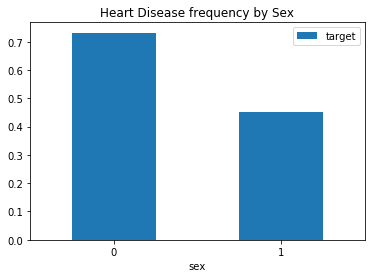

In [7]:
data.pivot_table(index='sex', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Sex')
plt.show()

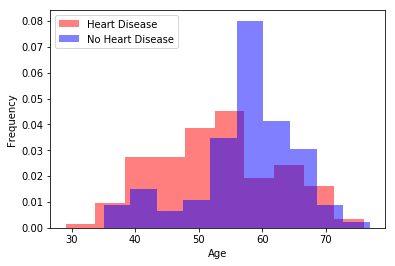

In [8]:
sick = data[data['target'] == 1]
not_sick = data[data['target'] == 0]
sick['age'].plot.hist(color='red', alpha=0.5, density=True)
not_sick['age'].plot.hist(color='blue', alpha=0.5, density=True)
plt.xlabel('Age')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

In [9]:
cut_points = [18, 44.5, 54.5, 64.5, 100]
labels = ['18-44', '45-54', '55-64', '65+']
data['age categories'] = pd.cut(data['age'], cut_points, labels=labels)

data['age categories'].value_counts()

55-64    94
45-54    67
18-44    43
65+      38
Name: age categories, dtype: int64

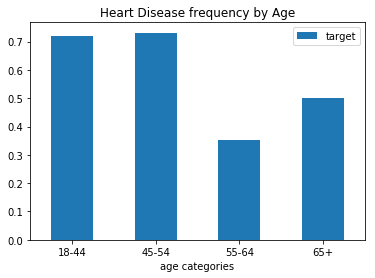

In [127]:
data.pivot_table(index='age categories', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Age')
plt.show()

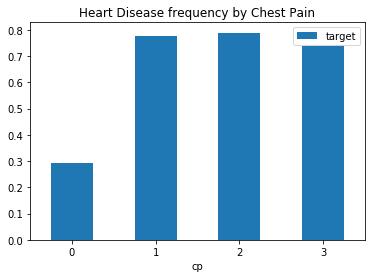

In [11]:
data.pivot_table(index='cp', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Chest Pain')
plt.show()

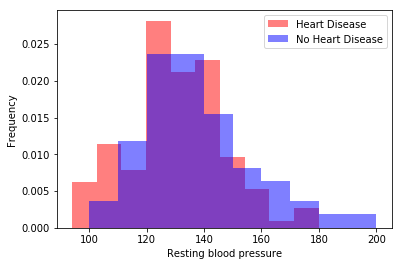

In [12]:
sick['trestbps'].plot.hist(color='red', alpha=0.5, density=True)
not_sick['trestbps'].plot.hist(color='blue', alpha=0.5, density=True)
plt.xlabel('Resting blood pressure')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

In [13]:
cut_points = [0, 120, 129.5, 139.5, 179.5, 220]
labels = ['<120', '120-129', '130-139', '140-179', '>180']
data['trestbps categories'] = pd.cut(data['trestbps'], cut_points, labels=labels)

data['trestbps categories'].value_counts()

<120       77
140-179    74
130-139    59
120-129    27
>180        5
Name: trestbps categories, dtype: int64

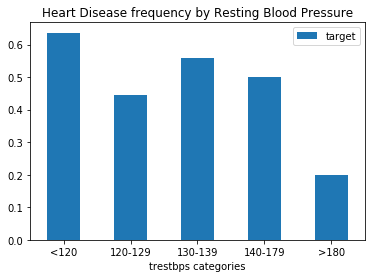

In [14]:
data.pivot_table(index='trestbps categories', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Resting Blood Pressure')
plt.show()

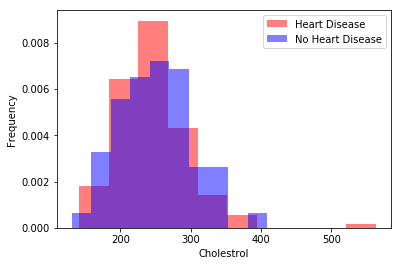

In [15]:
sick['chol'].plot.hist(color='red', alpha=0.5, density=True)
not_sick['chol'].plot.hist(color='blue', alpha=0.5, density=True)
plt.xlabel('Cholestrol')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

In [16]:
cut_points = [0, 99.5, 199.5, 299.5, 600]
labels = ['<100', '100-200', '200-300', '>300']
data['chol categories'] = pd.cut(data['chol'], cut_points, labels=labels)

data['chol categories'].value_counts()

200-300    166
100-200     39
>300        37
<100         0
Name: chol categories, dtype: int64

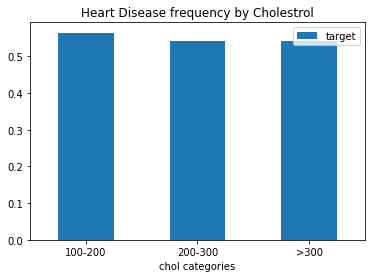

In [129]:
data.pivot_table(index='chol categories', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Cholestrol')
plt.show()

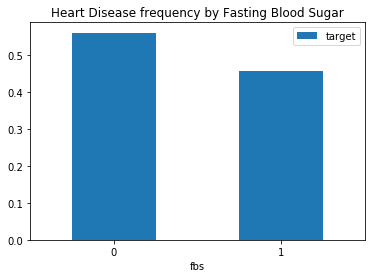

In [18]:
data.pivot_table(index='fbs', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Fasting Blood Sugar')
plt.show()

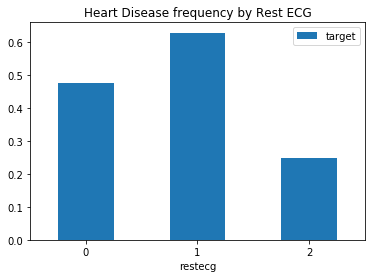

In [19]:
data.pivot_table(index='restecg', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Rest ECG')
plt.show()

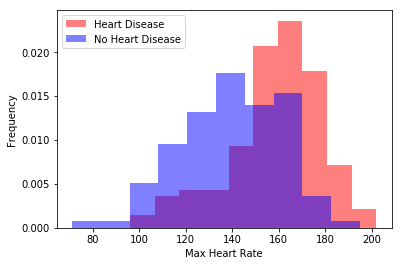

In [20]:
sick['thalach'].plot.hist(color='red', alpha=0.5, density=True)
not_sick['thalach'].plot.hist(color='blue', alpha=0.5, density=True)
plt.xlabel('Max Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

In [21]:
data['thalach categories'] = pd.qcut(data['thalach'], 5)
data['thalach categories'] = data['thalach categories'].astype(str).apply(lambda x: '%s-%s' % (x.split(',')[0].strip('('), x.split(',')[1].strip('] ')))
data['thalach categories'].value_counts()

147.4-159.0     51
70.999-130.2    49
130.2-147.4     48
169.0-202.0     47
159.0-169.0     47
Name: thalach categories, dtype: int64

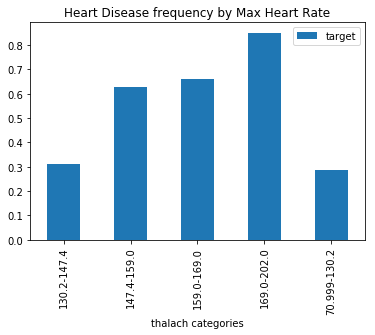

In [22]:
data.pivot_table(index='thalach categories', values='target').plot.bar()
plt.title('Heart Disease frequency by Max Heart Rate')
plt.show()

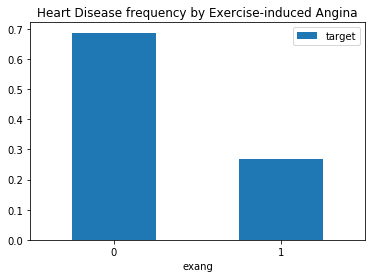

In [23]:
data.pivot_table(index='exang', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Exercise-induced Angina')
plt.show()

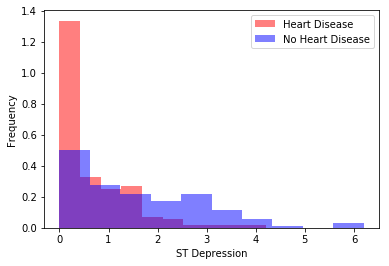

In [24]:
sick['oldpeak'].plot.hist(color='red', alpha=0.5, density=True)
not_sick['oldpeak'].plot.hist(color='blue', alpha=0.5, density=True)
plt.xlabel('ST Depression')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

In [25]:
data['oldpeak categories'] = pd.qcut(data['oldpeak'], 3)
data['oldpeak categories'] = data['oldpeak categories'].astype(str).apply(lambda x: '%s-%s' % (x.split(',')[0].strip('('), x.split(',')[1].strip('] ')))
data['oldpeak categories'].value_counts()

0.133-1.4       90
-0.001-0.133    81
1.4-6.2         71
Name: oldpeak categories, dtype: int64

Text(0.5, 1.0, 'Heart Disease frequency by ST Depression')

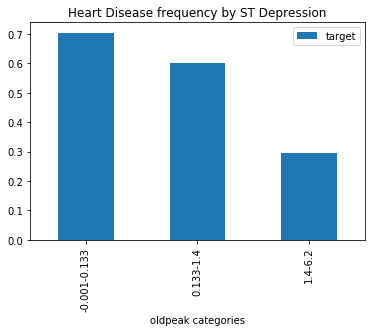

In [26]:
data.pivot_table(index='oldpeak categories', values='target').plot.bar()
plt.title('Heart Disease frequency by ST Depression')

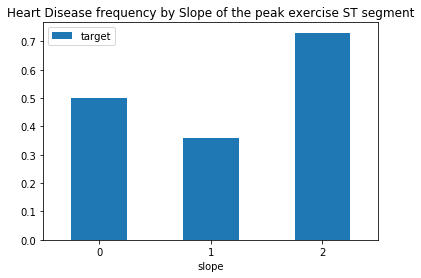

In [27]:
data.pivot_table(index='slope', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Slope of the peak exercise ST segment')
plt.show()

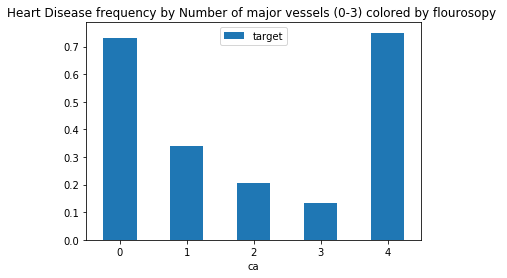

In [28]:
data.pivot_table(index='ca', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by Number of major vessels (0-3) colored by flourosopy ')
plt.show()

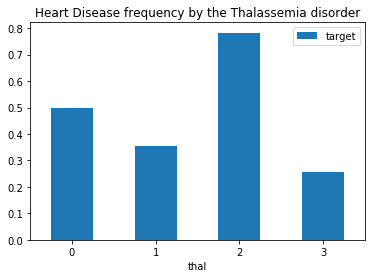

In [29]:
data.pivot_table(index='thal', values='target').plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Heart Disease frequency by the Thalassemia disorder')
plt.show()

# Data preprocessing

In [30]:
original_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [187]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']     

# One Hot Encoding of all Categorical Vairiables

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True) 
X_train['cp any'] = (X_train['cp_1'] + X_train['cp_2'] + X_train['cp_3'])   # any chest pain = 1 (look at EDA)
X_train = X_train.drop(columns=['cp_1', 'cp_2', 'cp_3'])
cols = X_train.columns

X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test.columns = [column.rstrip('.0') for column in X_test.columns]
X_test['cp any'] = (X_test['cp_1'] + X_test['cp_2'] + X_test['cp_3'])
X_test = X_test.drop(columns=['cp_1', 'cp_2', 'cp_3'])

In [188]:
X_train.shape, X_test.shape

((242, 20), (61, 18))

In [189]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,cp any
53,44,108,141,175,0.6,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
180,55,132,353,132,1.2,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0
173,58,132,224,173,3.2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
126,47,112,204,143,0.1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
125,34,118,210,192,0.7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1


In [190]:
X_test.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,fbs_1,restecg_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3,cp any
68,44,120,220,170,0.0,1,0,1,0,0,1,0,0,0,0,1,0,1
78,52,128,205,184,0.0,1,1,1,0,0,1,0,0,0,0,1,0,1
274,47,110,275,118,1.0,1,0,0,1,1,0,1,0,0,0,1,0,0
171,48,110,229,168,1.0,1,0,1,0,0,0,0,0,0,0,0,1,1
299,45,110,264,132,1.2,1,0,1,0,1,0,0,0,0,0,0,1,1


In [191]:
# Add columns of training set that are missing in test set.
missing_cols = list(set(X_train.columns) - set(X_test.columns))
for column in missing_cols:
    X_test[column] = 0

# To maintain same ordering of columns in train and test set.
X_test = X_test[cols]

X_train.shape[1] == X_test.shape[1]     # number of features

True

In [192]:
X_train.columns, X_test.columns

(Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'fbs_1',
        'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'ca_1',
        'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3', 'cp any'],
       dtype='object'),
 Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'fbs_1',
        'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'ca_1',
        'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3', 'cp any'],
       dtype='object'))

# Model Selection

In [384]:
rf = RandomForestClassifier(n_estimators=120, max_depth=5, random_state=10)
scores = cross_val_score(rf, X_train, y_train, cv=5)
print('Mean cross-validation score: ', scores.mean())

Mean cross-validation score:  0.8179421768707483


In [385]:
lr = LogisticRegression(solver='lbfgs', max_iter=5000)
scores = cross_val_score(lr, X_train, y_train, cv=5)
print('Mean cross-validation score: ', scores.mean())

Mean cross-validation score:  0.8386054421768708


In [386]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print('Mean cross-validation score: ', scores.mean())

Mean cross-validation score:  0.7893707482993197


In [387]:
svc = SVC(C=1000, gamma='scale', probability=True)
scores = cross_val_score(svc, X_train, y_train, cv=5)
print('Mean cross-validation score: ', scores.mean())

Mean cross-validation score:  0.7599489795918368


In [389]:
model = lr    # as Logistic Regression gave the best accuracy cross-validation score.
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)[:, 1]
ipd.display(pred[:10], pred_prob[:10])

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

array([0.96730409, 0.97282648, 0.09815145, 0.86795304, 0.58291448,
       0.60277529, 0.94890145, 0.98216439, 0.85437574, 0.94904896])

# Evaluating the model

In [390]:
print('Confusion Matrix:')
cf = confusion_matrix(y_test, model.predict(X_test))
cf

Confusion Matrix:


array([[23,  5],
       [ 2, 31]])

In [391]:
tp, fn, fp, tn = cf.flatten()

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy: ', accuracy)

precision = tp / (tp + fp)
print('Precision: ', precision)

rs = tp / (tp + fn)
print('Recall Sensitivity: ', rs)

spec = tn / (tn + fp)
print('Specificity: ', spec)

f1 = (2*tp) / (2*tp +fp + fn)
print('F1 score: ', f1)

Accuracy:  0.8852459016393442
Precision:  0.92
Recall Sensitivity:  0.8214285714285714
Specificity:  0.9393939393939394
F1 score:  0.8679245283018868


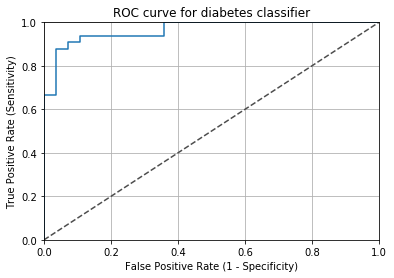

In [392]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls="--", c='.3')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [393]:
auc(fpr, tpr)

0.9653679653679653